In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_stores = pd.read_csv('datasets/dim_stores.csv')
df_stores

,store_id,city
0,STTRV-0,Trivandrum
1,STMDU-3,Madurai
2,STHYD-6,Hyderabad
3,STVSK-1,Visakhapatnam
4,STCBE-3,Coimbatore
5,STBLR-8,Bengaluru
6,STBLR-2,Bengaluru
7,STCHE-7,Chennai
8,STCBE-0,Coimbatore
9,STVSK-0,Visakhapatnam


In [3]:
sns.set_theme(style="whitegrid")

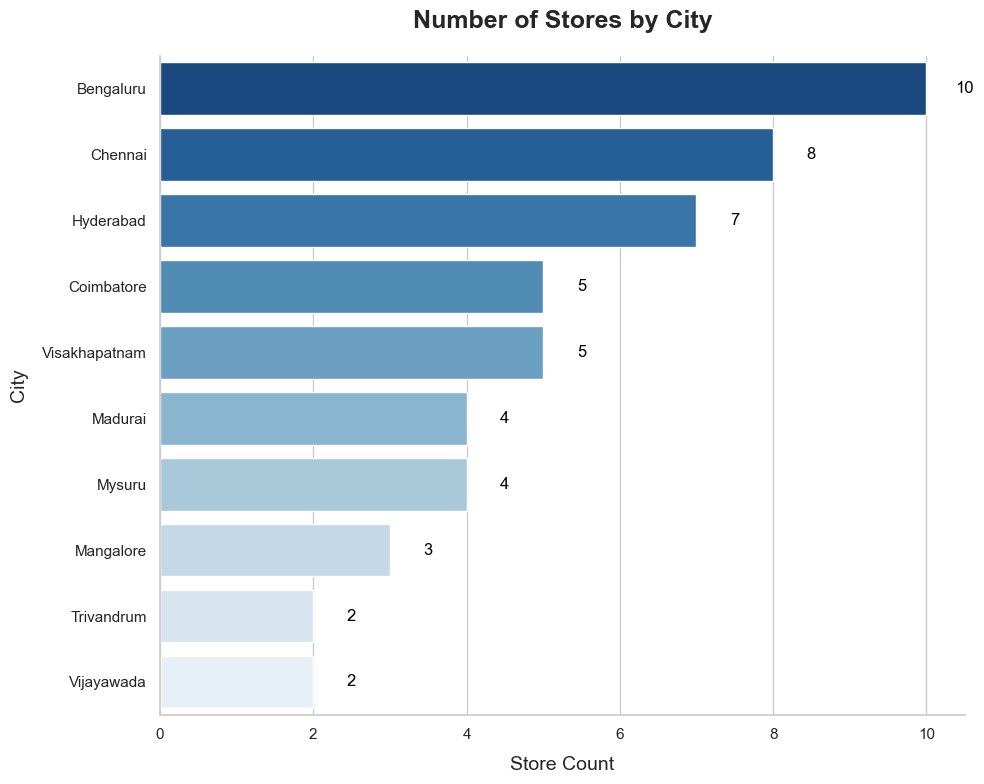

In [4]:
# Grouping data by city and counting the number of stores
grouped_data = df_stores.groupby('city')['store_id'].count().reset_index()

# Renaming the columns for clarity
grouped_data.columns = ['city', 'store_count']

# Sorting the data by store count in descending order
grouped_data = grouped_data.sort_values(by='store_count', ascending=False)

# Defining a professional color palette
palette = sns.color_palette("Blues_r", len(grouped_data))  # Reverse Blues palette for descending effect

# Creating the bar plot
plt.figure(figsize=(10, 8))
barplot = sns.barplot(
    data=grouped_data,
    x='store_count',
    y='city',  # Use horizontal bars for better readability with many categories
    palette=palette,
    hue='city'
)

# Adding value labels on each bar
for i, bar in enumerate(barplot.patches):
    bar_width = bar.get_width()
    barplot.text(
        bar_width + 0.5,  # X position (just to the right of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y position (center of the bar)
        f'{int(bar_width)}',  # Label
        ha='center', va='center', fontsize=12, color='black',
    )

# Adding titles and labels
plt.title('Number of Stores by City', fontsize=18, weight='bold', pad=20)
plt.xlabel('Store Count', fontsize=14, labelpad=10)
plt.ylabel('City', fontsize=14, labelpad=10)

# Removing top and right spines for a cleaner look
sns.despine(top=True, right=True)

# Display the plot
plt.tight_layout()
plt.show()


### **The city with the most stores: Bengaluru**
### ****

In [5]:
grouped_data = df_stores.groupby('city')['store_id'].count().reset_index()
grouped_data

,city,store_id
0,Bengaluru,10
1,Chennai,8
2,Coimbatore,5
3,Hyderabad,7
4,Madurai,4
5,Mangalore,3
6,Mysuru,4
7,Trivandrum,2
8,Vijayawada,2
9,Visakhapatnam,5


In [6]:
grouped_data['store_id'].mean()

np.float64(5.0)

## **Q2**

In [7]:
df_events = pd.read_csv('datasets/fact_events.csv')
df_events

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272
...,...,...,...,...,...,...,...,...,...
1495,9bd616,STCHE-0,CAMP_DIW_01,P01,172,330.0,33% OFF,115,504
1496,fe4a15,STCBE-4,CAMP_SAN_01,P01,172,205.0,33% OFF,115,284
1497,2f0b42,STVSK-1,CAMP_SAN_01,P01,172,78.0,33% OFF,115,302
1498,339bf7,STCHE-5,CAMP_DIW_01,P05,55,127.0,25% OFF,41,109


In [8]:
df_events.isna().sum()

event_id                       0
store_id                       0
campaign_id                    0
product_code                   0
base_price(before_promo)       0
quantity_sold(before_promo)    0
promo_type                     0
base_price(after_promo)        0
quantity_sold(after_promo)     0
dtype: int64

In [9]:
df_events.duplicated().sum()

np.int64(0)

In [10]:
sankranti_campaign = df_events[df_events['campaign_id'] == 'CAMP_SAN_01']
sankranti_campaign

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272
7,6.88E+10,STVJD-0,CAMP_SAN_01,P08,1190,22.0,BOGOF,595,88
10,a7fecb,STBLR-1,CAMP_SAN_01,P03,200,361.0,BOGOF,100,963
11,d04bc1,STCBE-0,CAMP_SAN_01,P09,90,49.0,25% OFF,67,46
...,...,...,...,...,...,...,...,...,...
1492,ff3c54,STCHE-3,CAMP_SAN_01,P05,55,24.0,25% OFF,41,19
1494,c0929c,STHYD-0,CAMP_SAN_01,P05,55,18.0,25% OFF,41,14
1496,fe4a15,STCBE-4,CAMP_SAN_01,P01,172,205.0,33% OFF,115,284
1497,2f0b42,STVSK-1,CAMP_SAN_01,P01,172,78.0,33% OFF,115,302


In [11]:
grouped_data = sankranti_campaign.groupby('product_code').agg(
    total_quantity_sold_after_promo = ('quantity_sold(after_promo)', 'sum')
)

grouped_data

,total_quantity_sold_after_promo
product_code,
P01,17489
P02,29970
P03,61185
P04,69080
P05,875
P06,1102
P07,7103
P08,7814
P09,2186


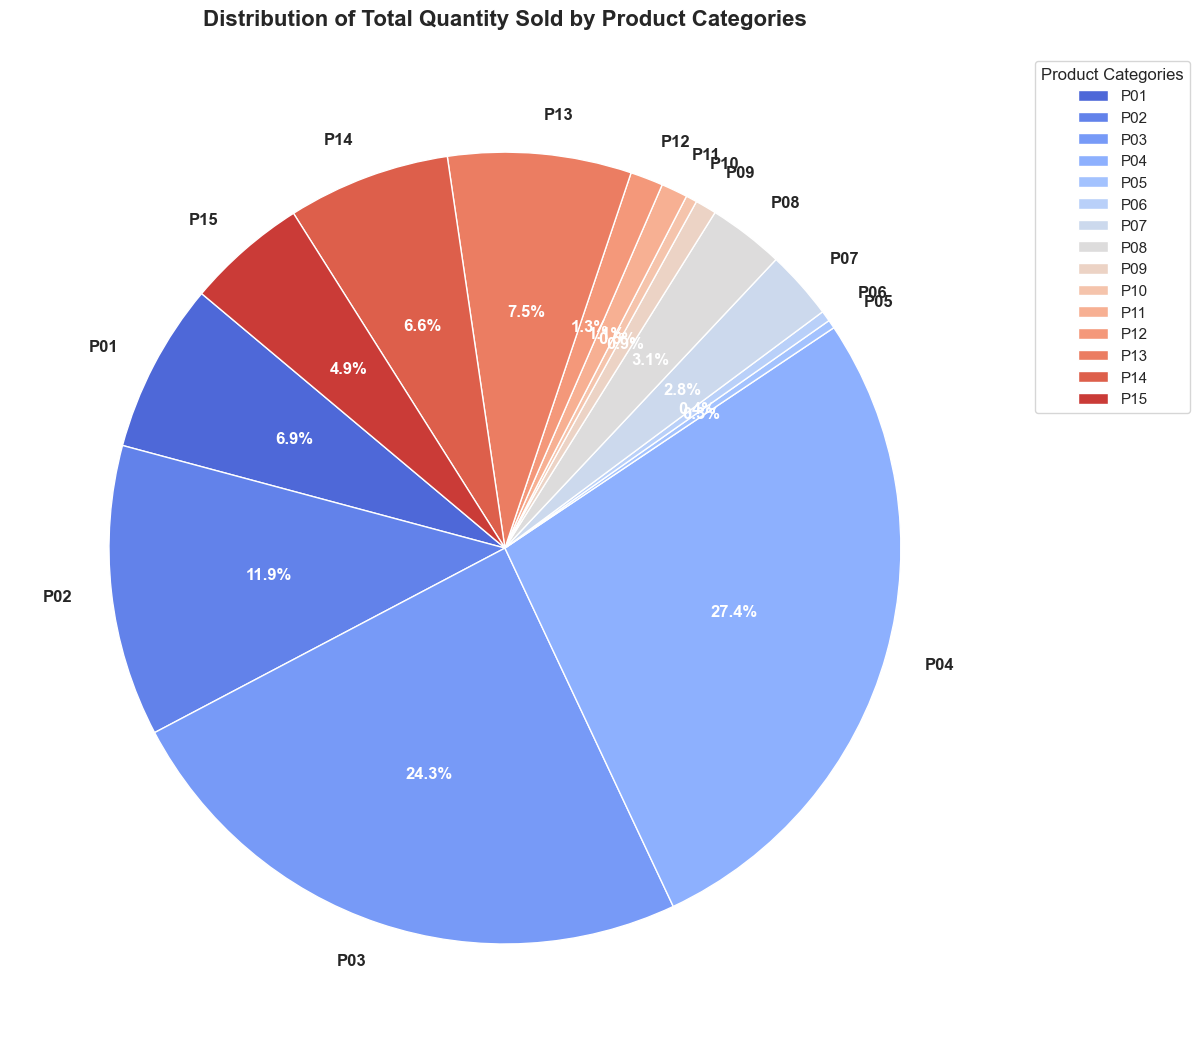

In [12]:
# Example data (replace categories and quantities with your own)
categories = grouped_data.index
quantities = grouped_data['total_quantity_sold_after_promo']

# Set Seaborn style for consistency
sns.set_theme(style="whitegrid")

# Explode the largest slice for emphasis (customize based on your data)
explode = [0.1 if i == quantities.idxmax() else 0 for i in range(len(quantities))]

# Define custom color palette
colors = sns.color_palette("coolwarm", len(categories))

# Plot the pie chart
plt.figure(figsize=(12, 12))
wedges, texts, autotexts = plt.pie(
    quantities,
    labels=categories,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    textprops={'fontsize': 12, 'weight': 'bold'}
)

# Improve text and label appearance
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

# Add a legend
plt.legend(wedges, categories, title="Product Categories", loc="upper right", bbox_to_anchor=(1.2, 1))

# Add a title
plt.title('Distribution of Total Quantity Sold by Product Categories', fontsize=16, fontweight='bold', pad=20)

# Show the chart
plt.tight_layout()
plt.show()


In [13]:
df_products = pd.read_csv('datasets/dim_products.csv')
df_products.iloc[14, 2] = 'Combo'
df_products

,product_code,product_name,category
0,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples
1,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
2,P03,Atliq_Suflower_Oil (1L),Grocery & Staples
3,P04,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
4,P05,Atliq_Scrub_Sponge_For_Dishwash,Home Care
5,P06,Atliq_Fusion_Container_Set_of_3,Home Care
6,P09,Atliq_Body_Milk_Nourishing_Lotion (120ML),Personal Care
7,P10,Atliq_Cream_Beauty_Bathing_Soap (125GM),Personal Care
8,P13,Atliq_High_Glo_15W_LED_Bulb,Home Appliances
9,P14,Atliq_waterproof_Immersion_Rod,Home Appliances


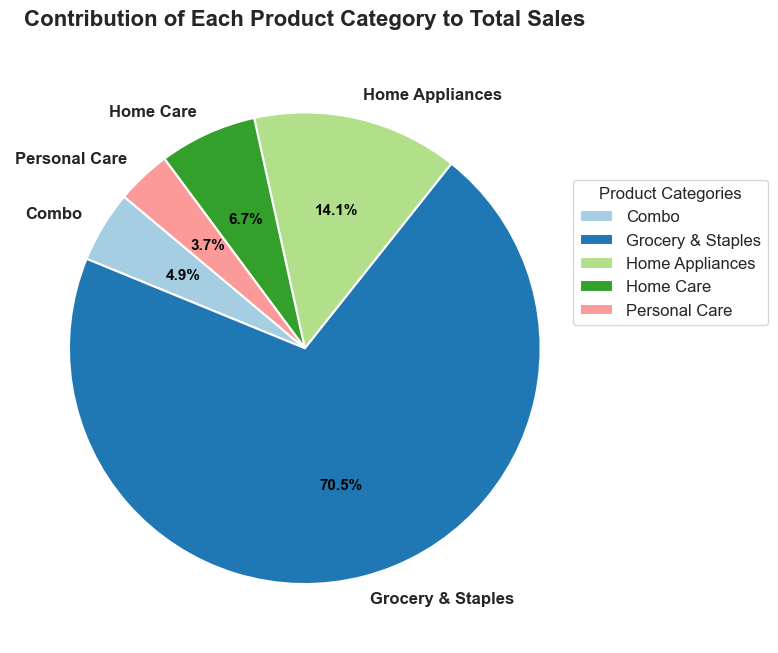

In [14]:
# Merge product data with sales data
merged_data = pd.merge(sankranti_campaign, df_products, on='product_code')

# Group by product category and sum sales
category_sales = merged_data.groupby('category').agg(
    total_sales=('quantity_sold(after_promo)', 'sum')
).reset_index()

# Calculate percentage contribution
category_sales['percentage'] = (category_sales['total_sales'] / category_sales['total_sales'].sum()) * 100
category_sales['percentage'] = category_sales['percentage'].round(2)

# Plot a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    category_sales['total_sales'],
    labels=category_sales['category'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
    textprops={'fontsize': 12, 'weight': 'bold'}
)

# Customize autopct font
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(11)

# Add a legend for clarity
ax.legend(
    category_sales['category'],
    title='Product Categories',
    loc='upper right',
    bbox_to_anchor=(1.3, 0.8),
    fontsize=12
)

# Add a title with custom styling
plt.title('Contribution of Each Product Category to Total Sales', 
          fontsize=16, fontweight='bold', pad=20)

# Adjust layout for better visualization
plt.tight_layout()

# Display the chart
plt.show()


In [15]:
# Display the result
category_sales

,category,total_sales,percentage
0,Combo,12411,4.92
1,Grocery & Staples,177724,70.51
2,Home Appliances,35610,14.13
3,Home Care,16894,6.70
4,Personal Care,9430,3.74


## **Q3**

In [16]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   event_id                     1500 non-null   object 
 1   store_id                     1500 non-null   object 
 2   campaign_id                  1500 non-null   object 
 3   product_code                 1500 non-null   object 
 4   base_price(before_promo)     1500 non-null   int64  
 5   quantity_sold(before_promo)  1500 non-null   float64
 6   promo_type                   1500 non-null   object 
 7   base_price(after_promo)      1500 non-null   int64  
 8   quantity_sold(after_promo)   1500 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 105.6+ KB


In [17]:
df_numeric = df_events.select_dtypes(['int64', 'float64'])
df_numeric

,base_price(before_promo),quantity_sold(before_promo),base_price(after_promo),quantity_sold(after_promo)
0,290,327.0,217,287
1,370,379.0,185,1622
2,860,337.0,576,488
3,55,122.0,41,107
4,3000,122.0,2500,272
...,...,...,...,...
1495,172,330.0,115,504
1496,172,205.0,115,284
1497,172,78.0,115,302
1498,55,127.0,41,109


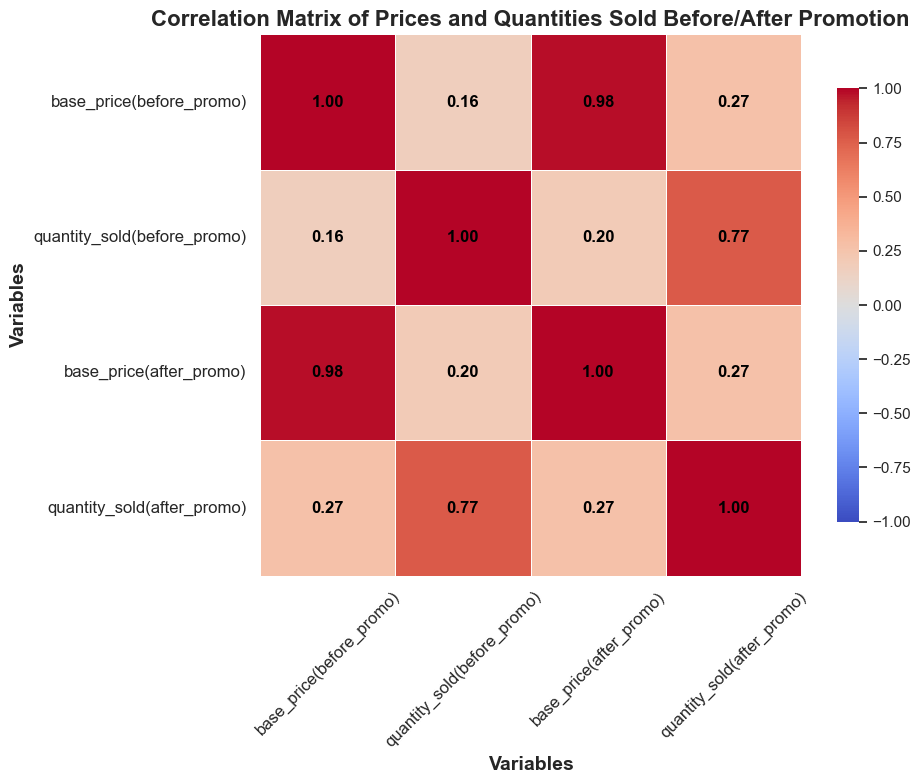

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Set the size of the heatmap
plt.figure(figsize=(10, 8))  # Increased size for better readability

# Create the heatmap with customizations
sns.heatmap(
    correlation_matrix,
    annot=True,  # Display correlation values
    cmap='coolwarm',  # Color map for better distinction
    fmt='.2f',  # Format the annotations to 2 decimal places
    linewidths=0.5,  # Line width between cells
    cbar_kws={"shrink": 0.8},  # Adjust the color bar size
    annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'},  # Larger and bolder annotations
    vmin=-1, vmax=1,  # Set the colormap range for better visualization of both positive and negative correlations
    square=True  # Ensure a square heatmap for better aesthetics
)

# Add a title to the heatmap
plt.title('Correlation Matrix of Prices and Quantities Sold Before/After Promotion', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)  # Rotate and increase font size for x-axis labels
plt.yticks(fontsize=12)  # Increase font size for y-axis labels

# Customize axes labels
plt.xlabel('Variables', fontsize=14, fontweight='bold')  # Label for x-axis
plt.ylabel('Variables', fontsize=14, fontweight='bold')  # Label for y-axis

# Add a grid for better readability
plt.grid(False)  # Remove default grid, consider adding a custom grid with finer lines

# Display the heatmap
plt.tight_layout()
plt.show()

In [19]:
correlation_matrix

,base_price(before_promo),quantity_sold(before_promo),base_price(after_promo),quantity_sold(after_promo)
base_price(before_promo),1.000000,0.164488,0.982047,0.266130
quantity_sold(before_promo),0.164488,1.000000,0.196898,0.772285
base_price(after_promo),0.982047,0.196898,1.000000,0.269404
quantity_sold(after_promo),0.266130,0.772285,0.269404,1.000000


In [20]:
df_events.describe()

,base_price(before_promo),quantity_sold(before_promo),base_price(after_promo),quantity_sold(after_promo)
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,551.966667,138.433333,366.933333,290.315333
std,741.394953,131.032861,600.671902,363.444413
min,50.000000,10.000000,31.000000,9.000000
25%,110.000000,45.000000,67.000000,74.000000
50%,295.000000,78.000000,150.000000,163.000000
75%,860.000000,211.000000,510.000000,337.000000
max,3000.000000,642.000000,2500.000000,2067.000000


## **Q4**

In [21]:
df_events

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272
...,...,...,...,...,...,...,...,...,...
1495,9bd616,STCHE-0,CAMP_DIW_01,P01,172,330.0,33% OFF,115,504
1496,fe4a15,STCBE-4,CAMP_SAN_01,P01,172,205.0,33% OFF,115,284
1497,2f0b42,STVSK-1,CAMP_SAN_01,P01,172,78.0,33% OFF,115,302
1498,339bf7,STCHE-5,CAMP_DIW_01,P05,55,127.0,25% OFF,41,109


In [22]:
merged_data = pd.merge(df_events, df_products, on='product_code')
merged_data

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Atliq_Home_Essential_8_Product_Combo,Combo
...,...,...,...,...,...,...,...,...,...,...,...
1495,9bd616,STCHE-0,CAMP_DIW_01,P01,172,330.0,33% OFF,115,504,Atliq_Masoor_Dal (1KG),Grocery & Staples
1496,fe4a15,STCBE-4,CAMP_SAN_01,P01,172,205.0,33% OFF,115,284,Atliq_Masoor_Dal (1KG),Grocery & Staples
1497,2f0b42,STVSK-1,CAMP_SAN_01,P01,172,78.0,33% OFF,115,302,Atliq_Masoor_Dal (1KG),Grocery & Staples
1498,339bf7,STCHE-5,CAMP_DIW_01,P05,55,127.0,25% OFF,41,109,Atliq_Scrub_Sponge_For_Dishwash,Home Care


In [23]:
all_categories = merged_data['category'].unique().tolist()

In [24]:
all_categories

['Grocery & Staples', 'Home Care', 'Combo', 'Home Appliances', 'Personal Care']

In [25]:
df_grocery_staples = merged_data[merged_data['category'] == 'Grocery & Staples']
df_home_care = merged_data[merged_data['category'] == 'Home Care']
df_combo1 = merged_data[merged_data['category'] == 'Combo1']
df_home_appliances = merged_data[merged_data['category'] == 'Home Appliances']
df_personal_care = merged_data[merged_data['category'] == 'Personal Care']


In [26]:
df_grocery_staples

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
5,87564a,STCHE-6,CAMP_DIW_01,P04,290,346.0,25% OFF,217,269,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
10,a7fecb,STBLR-1,CAMP_SAN_01,P03,200,361.0,BOGOF,100,963,Atliq_Suflower_Oil (1L),Grocery & Staples
...,...,...,...,...,...,...,...,...,...,...,...
1488,b5cd07,STVSK-3,CAMP_SAN_01,P01,172,222.0,33% OFF,115,275,Atliq_Masoor_Dal (1KG),Grocery & Staples
1491,bb974d,STBLR-2,CAMP_SAN_01,P03,200,307.0,BOGOF,100,1200,Atliq_Suflower_Oil (1L),Grocery & Staples
1495,9bd616,STCHE-0,CAMP_DIW_01,P01,172,330.0,33% OFF,115,504,Atliq_Masoor_Dal (1KG),Grocery & Staples
1496,fe4a15,STCBE-4,CAMP_SAN_01,P01,172,205.0,33% OFF,115,284,Atliq_Masoor_Dal (1KG),Grocery & Staples


In [27]:
df_home_care

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Atliq_Scrub_Sponge_For_Dishwash,Home Care
7,6.88E+10,STVJD-0,CAMP_SAN_01,P08,1190,22.0,BOGOF,595,88,Atliq_Double_Bedsheet_set,Home Care
8,66c422,STBLR-5,CAMP_DIW_01,P07,300,66.0,BOGOF,150,227,Atliq_Curtains,Home Care
35,7f6f08,STBLR-7,CAMP_SAN_01,P05,55,24.0,25% OFF,41,20,Atliq_Scrub_Sponge_For_Dishwash,Home Care
41,9acae6,STMYS-0,CAMP_DIW_01,P05,55,73.0,25% OFF,41,65,Atliq_Scrub_Sponge_For_Dishwash,Home Care
...,...,...,...,...,...,...,...,...,...,...,...
1486,f41ca1,STCBE-2,CAMP_DIW_01,P07,300,42.0,BOGOF,150,166,Atliq_Curtains,Home Care
1489,e17280,STVSK-2,CAMP_DIW_01,P08,1190,38.0,BOGOF,595,129,Atliq_Double_Bedsheet_set,Home Care
1492,ff3c54,STCHE-3,CAMP_SAN_01,P05,55,24.0,25% OFF,41,19,Atliq_Scrub_Sponge_For_Dishwash,Home Care
1494,c0929c,STHYD-0,CAMP_SAN_01,P05,55,18.0,25% OFF,41,14,Atliq_Scrub_Sponge_For_Dishwash,Home Care


In [28]:
df_combo1

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category


In [29]:
df_home_appliances

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category
6,6bbadf,STHYD-1,CAMP_DIW_01,P14,1020,43.0,BOGOF,510,127,Atliq_waterproof_Immersion_Rod,Home Appliances
9,108d5a,STCBE-0,CAMP_DIW_01,P14,1020,29.0,BOGOF,510,101,Atliq_waterproof_Immersion_Rod,Home Appliances
13,e7d681,STCHE-5,CAMP_DIW_01,P13,350,66.0,BOGOF,175,226,Atliq_High_Glo_15W_LED_Bulb,Home Appliances
15,4b3df6,STTRV-1,CAMP_SAN_01,P14,1020,61.0,BOGOF,510,234,Atliq_waterproof_Immersion_Rod,Home Appliances
27,ba86f4,STVSK-1,CAMP_DIW_01,P13,350,61.0,BOGOF,175,204,Atliq_High_Glo_15W_LED_Bulb,Home Appliances
...,...,...,...,...,...,...,...,...,...,...,...
1462,2b0db4,STMLR-2,CAMP_DIW_01,P14,1020,21.0,BOGOF,510,73,Atliq_waterproof_Immersion_Rod,Home Appliances
1465,5760fd,STCBE-1,CAMP_SAN_01,P13,350,87.0,BOGOF,175,346,Atliq_High_Glo_15W_LED_Bulb,Home Appliances
1476,6ae240,STBLR-4,CAMP_SAN_01,P13,350,94.0,BOGOF,175,371,Atliq_High_Glo_15W_LED_Bulb,Home Appliances
1481,c5f80e,STCHE-1,CAMP_DIW_01,P14,1020,43.0,BOGOF,510,125,Atliq_waterproof_Immersion_Rod,Home Appliances


In [30]:
df_personal_care

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),product_name,category
11,d04bc1,STCBE-0,CAMP_SAN_01,P09,90,49.0,25% OFF,67,46,Atliq_Body_Milk_Nourishing_Lotion (120ML),Personal Care
12,ed7b12,STVSK-0,CAMP_SAN_01,P10,50,16.0,25% OFF,37,13,Atliq_Cream_Beauty_Bathing_Soap (125GM),Personal Care
14,02ebe9,STBLR-8,CAMP_DIW_01,P11,190,66.0,50% OFF,95,88,Atliq_Doodh_Kesar_Body_Lotion (200ML),Personal Care
18,a2d32f,STVSK-3,CAMP_SAN_01,P09,90,39.0,25% OFF,67,31,Atliq_Body_Milk_Nourishing_Lotion (120ML),Personal Care
19,08086d,STBLR-7,CAMP_DIW_01,P10,65,120.0,50% OFF,32,188,Atliq_Cream_Beauty_Bathing_Soap (125GM),Personal Care
...,...,...,...,...,...,...,...,...,...,...,...
1471,f4192d,STMYS-1,CAMP_DIW_01,P11,190,84.0,50% OFF,95,121,Atliq_Doodh_Kesar_Body_Lotion (200ML),Personal Care
1474,f3d93f,STHYD-4,CAMP_DIW_01,P09,110,73.0,50% OFF,55,95,Atliq_Body_Milk_Nourishing_Lotion (120ML),Personal Care
1480,3ace0f,STVSK-2,CAMP_DIW_01,P09,110,64.0,50% OFF,55,98,Atliq_Body_Milk_Nourishing_Lotion (120ML),Personal Care
1490,3d7dc9,STCHE-1,CAMP_DIW_01,P10,65,127.0,50% OFF,32,133,Atliq_Cream_Beauty_Bathing_Soap (125GM),Personal Care


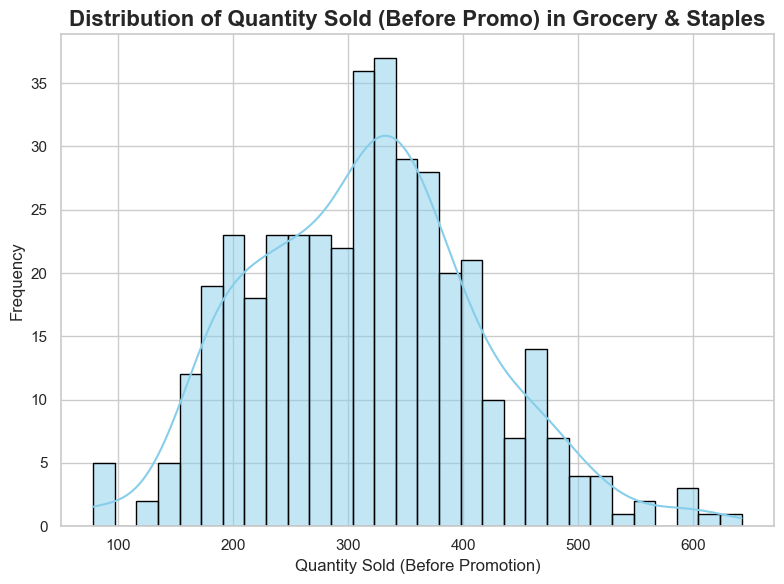

In [31]:
# Set the style for a clean, professional look
sns.set(style="whitegrid")

# Create the histogram for 'quantity_sold(before_promo)' in the 'Grocery & Staples' category
plt.figure(figsize=(8, 6))  # Adjust the size for a better fit
sns.histplot(df_grocery_staples['quantity_sold(before_promo)'], 
             kde=True,  # Adding Kernel Density Estimation for smoother visualization
             bins=30,  # Set the number of bins for better granularity
             color='skyblue',  # Color choice for better aesthetics
             edgecolor='black')  # Outline the bars for better visibility

# Add titles and labels for clarity
plt.title('Distribution of Quantity Sold (Before Promo) in Grocery & Staples', fontsize=16, fontweight='bold')
plt.xlabel('Quantity Sold (Before Promotion)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust the layout to avoid overlapping
plt.show()

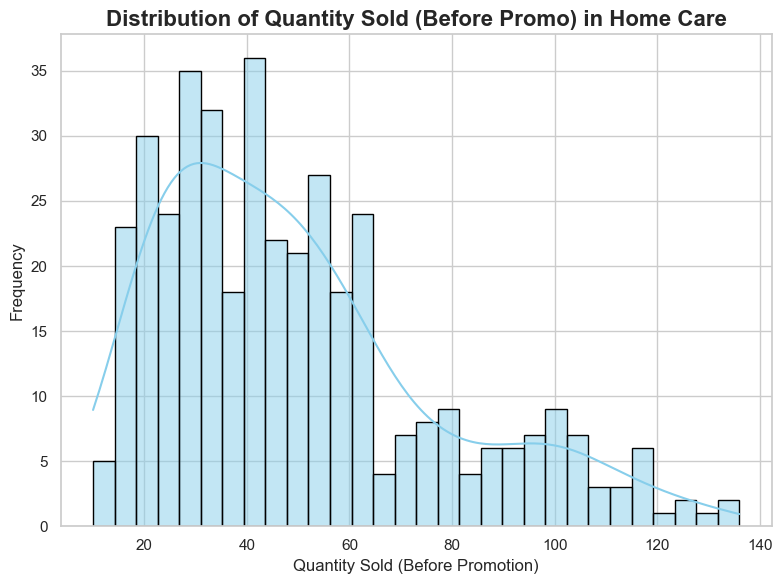

In [32]:

plt.figure(figsize=(8, 6))  # Adjust the size for a better fit
sns.histplot(df_home_care['quantity_sold(before_promo)'], 
             kde=True,  # Adding Kernel Density Estimation for smoother visualization
             bins=30,  # Set the number of bins for better granularity
             color='skyblue',  # Color choice for better aesthetics
             edgecolor='black')  # Outline the bars for better visibility

# Add titles and labels for clarity
plt.title('Distribution of Quantity Sold (Before Promo) in Home Care', fontsize=16, fontweight='bold')
plt.xlabel('Quantity Sold (Before Promotion)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust the layout to avoid overlapping
plt.show()

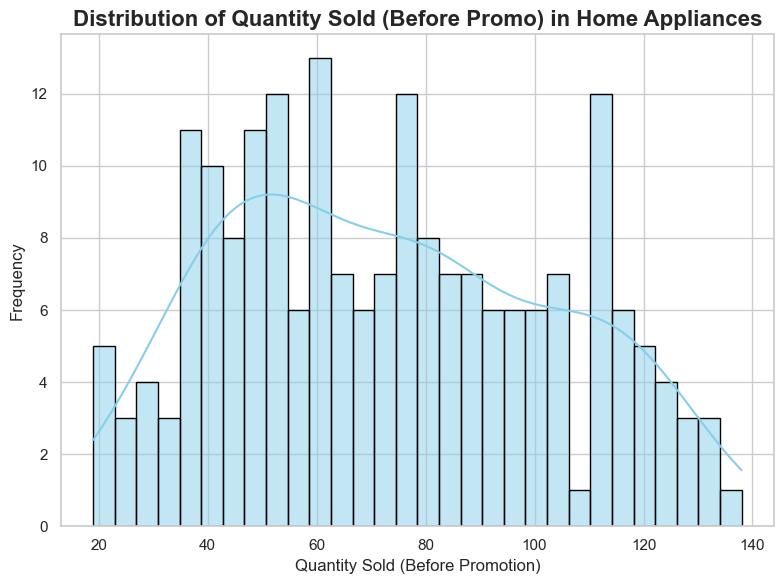

In [33]:

plt.figure(figsize=(8, 6))  # Adjust the size for a better fit
sns.histplot(df_home_appliances['quantity_sold(before_promo)'], 
             kde=True,  # Adding Kernel Density Estimation for smoother visualization
             bins=30,  # Set the number of bins for better granularity
             color='skyblue',  # Color choice for better aesthetics
             edgecolor='black')  # Outline the bars for better visibility

# Add titles and labels for clarity
plt.title('Distribution of Quantity Sold (Before Promo) in Home Appliances', fontsize=16, fontweight='bold')
plt.xlabel('Quantity Sold (Before Promotion)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust the layout to avoid overlapping
plt.show()

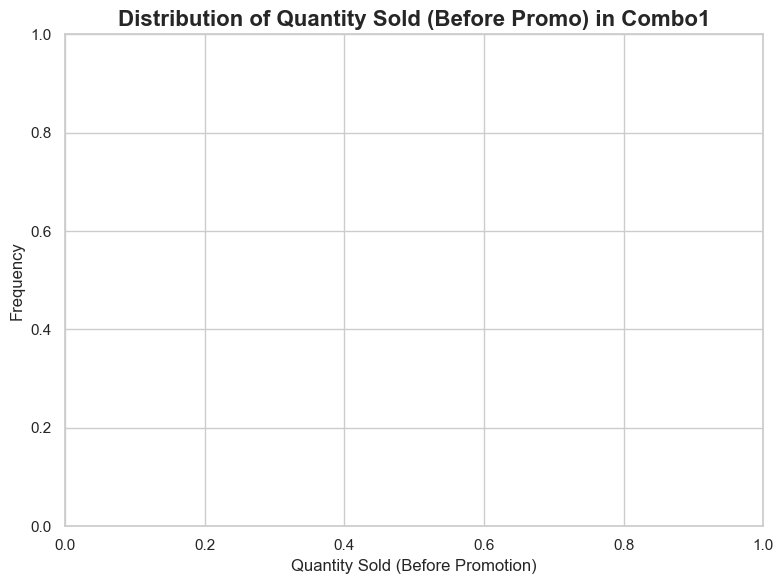

In [34]:

plt.figure(figsize=(8, 6))  # Adjust the size for a better fit
sns.histplot(df_combo1['quantity_sold(before_promo)'], 
             kde=True,  # Adding Kernel Density Estimation for smoother visualization
             bins=30,  # Set the number of bins for better granularity
             color='skyblue',  # Color choice for better aesthetics
             edgecolor='black')  # Outline the bars for better visibility

# Add titles and labels for clarity
plt.title('Distribution of Quantity Sold (Before Promo) in Combo1', fontsize=16, fontweight='bold')
plt.xlabel('Quantity Sold (Before Promotion)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust the layout to avoid overlapping
plt.show()

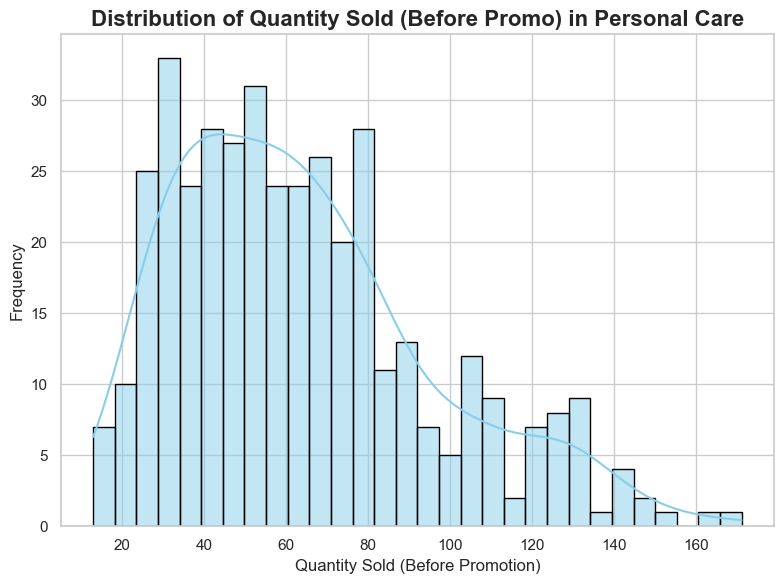

In [35]:

plt.figure(figsize=(8, 6))  # Adjust the size for a better fit
sns.histplot(df_personal_care['quantity_sold(before_promo)'], 
             kde=True,  # Adding Kernel Density Estimation for smoother visualization
             bins=30,  # Set the number of bins for better granularity
             color='skyblue',  # Color choice for better aesthetics
             edgecolor='black')  # Outline the bars for better visibility

# Add titles and labels for clarity
plt.title('Distribution of Quantity Sold (Before Promo) in Personal Care', fontsize=16, fontweight='bold')
plt.xlabel('Quantity Sold (Before Promotion)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust the layout to avoid overlapping
plt.show()

## **Q5**

In [36]:
df_events

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272
...,...,...,...,...,...,...,...,...,...
1495,9bd616,STCHE-0,CAMP_DIW_01,P01,172,330.0,33% OFF,115,504
1496,fe4a15,STCBE-4,CAMP_SAN_01,P01,172,205.0,33% OFF,115,284
1497,2f0b42,STVSK-1,CAMP_SAN_01,P01,172,78.0,33% OFF,115,302
1498,339bf7,STCHE-5,CAMP_DIW_01,P05,55,127.0,25% OFF,41,109


In [37]:
df_stores.head()

,store_id,city
0,STTRV-0,Trivandrum
1,STMDU-3,Madurai
2,STHYD-6,Hyderabad
3,STVSK-1,Visakhapatnam
4,STCBE-3,Coimbatore


In [38]:
merged = pd.merge(df_events, df_stores, on='store_id')
merged

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),city
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Chennai
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Chennai
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Bengaluru
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Bengaluru
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Hyderabad
...,...,...,...,...,...,...,...,...,...,...
1495,9bd616,STCHE-0,CAMP_DIW_01,P01,172,330.0,33% OFF,115,504,Chennai
1496,fe4a15,STCBE-4,CAMP_SAN_01,P01,172,205.0,33% OFF,115,284,Coimbatore
1497,2f0b42,STVSK-1,CAMP_SAN_01,P01,172,78.0,33% OFF,115,302,Visakhapatnam
1498,339bf7,STCHE-5,CAMP_DIW_01,P05,55,127.0,25% OFF,41,109,Chennai


In [39]:
# Aggregate revenue and quantity sold by product_code
aggregated_campaign = merged.groupby('city').agg(
    quantity_sold_before_promo=('quantity_sold(before_promo)', 'sum'),
    quantity_sold_after_promo=('quantity_sold(after_promo)', 'sum')
).reset_index() # reset_index converts the groupby object into a dataframe

# Calculate IR% for each product after aggregation
aggregated_campaign['ISU%'] = (
    (aggregated_campaign['quantity_sold_after_promo'] - aggregated_campaign['quantity_sold_before_promo']) 
    / aggregated_campaign['quantity_sold_before_promo']
) * 100

# Round IR% to 2 decimal places
aggregated_campaign['ISU%'] = np.round(aggregated_campaign['ISU%'], 2)

In [40]:
aggregated_campaign

,city,quantity_sold_before_promo,quantity_sold_after_promo,ISU%
0,Bengaluru,48972.0,105141,114.70
1,Chennai,39183.0,83273,112.52
2,Coimbatore,18200.0,38900,113.74
3,Hyderabad,34335.0,69399,102.12
4,Madurai,14086.0,31169,121.28
5,Mangalore,7454.0,14929,100.28
6,Mysuru,18202.0,37470,105.86
7,Trivandrum,4884.0,10170,108.23
8,Vijayawada,5297.0,11106,109.67
9,Visakhapatnam,17037.0,33916,99.07


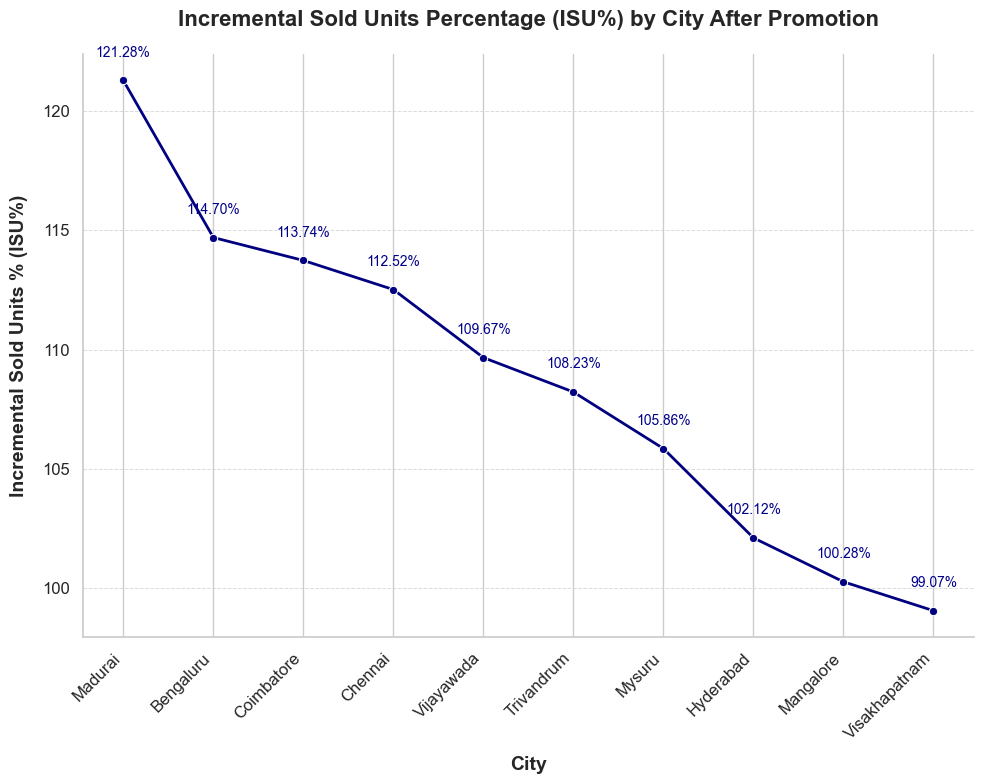

In [41]:
# Sort the data by ISU% in descending order
aggregated_campaign_sorted = aggregated_campaign.sort_values(by='ISU%', ascending=False)

plt.figure(figsize=(10, 8))

# Use a professional line style and color palette
sns.lineplot(
    data=aggregated_campaign_sorted, 
    x='city', 
    y='ISU%', 
    marker='o', 
    color='navy', 
    linewidth=2
)

# Customize axis labels
plt.xlabel('City', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Incremental Sold Units % (ISU%)', fontsize=14, fontweight='bold', labelpad=10)

# Add a title
plt.title('Incremental Sold Units Percentage (ISU%) by City After Promotion', fontsize=16, fontweight='bold', pad=20)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust y-axis ticks for readability
plt.yticks(fontsize=12)

# Add data labels on each point
for x, y in zip(aggregated_campaign_sorted['city'], aggregated_campaign_sorted['ISU%']):
    plt.text(
        x, y + 1,  # Slightly above the point
        f'{y:.2f}%',  # Format as percentage
        ha='center', fontsize=10, color='darkblue'
    )

# Remove top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


## **Q6**

In [42]:
merged

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),city
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Chennai
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Chennai
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Bengaluru
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Bengaluru
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Hyderabad
...,...,...,...,...,...,...,...,...,...,...
1495,9bd616,STCHE-0,CAMP_DIW_01,P01,172,330.0,33% OFF,115,504,Chennai
1496,fe4a15,STCBE-4,CAMP_SAN_01,P01,172,205.0,33% OFF,115,284,Coimbatore
1497,2f0b42,STVSK-1,CAMP_SAN_01,P01,172,78.0,33% OFF,115,302,Visakhapatnam
1498,339bf7,STCHE-5,CAMP_DIW_01,P05,55,127.0,25% OFF,41,109,Chennai


In [43]:
merged_hyd = merged[merged['city'] == 'Hyderabad']
merged_hyd

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),city
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Hyderabad
6,6bbadf,STHYD-1,CAMP_DIW_01,P14,1020,43.0,BOGOF,510,127,Hyderabad
17,90110c,STHYD-0,CAMP_SAN_01,P04,370,412.0,BOGOF,185,1615,Hyderabad
23,31c430,STHYD-1,CAMP_SAN_01,P01,172,312.0,33% OFF,115,393,Hyderabad
24,42fb76,STHYD-5,CAMP_DIW_01,P10,65,112.0,50% OFF,32,151,Hyderabad
...,...,...,...,...,...,...,...,...,...,...
1438,333ef0,STHYD-0,CAMP_DIW_01,P14,1020,47.0,BOGOF,510,163,Hyderabad
1450,9d63a7,STHYD-6,CAMP_SAN_01,P08,1190,43.0,BOGOF,595,166,Hyderabad
1474,f3d93f,STHYD-4,CAMP_DIW_01,P09,110,73.0,50% OFF,55,95,Hyderabad
1493,655aa2,STHYD-0,CAMP_DIW_01,P10,65,112.0,50% OFF,32,170,Hyderabad


In [44]:
merged_hyd.loc[:,'rev_before_promo'] = merged_hyd['base_price(before_promo)'] * merged_hyd['quantity_sold(before_promo)']
merged_hyd.loc[:,'rev_after_promo'] = merged_hyd['base_price(after_promo)'] * merged_hyd['quantity_sold(after_promo)']

merged_hyd

C:\Users\maazs\AppData\Local\Temp\ipykernel_16676\125743436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_hyd.loc[:,'rev_before_promo'] = merged_hyd['base_price(before_promo)'] * merged_hyd['quantity_sold(before_promo)']
C:\Users\maazs\AppData\Local\Temp\ipykernel_16676\125743436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_hyd.loc[:,'rev_after_promo'] = merged_hyd['base_price(after_promo)'] * merged_hyd['quantity_sold(after_promo)']


,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),city,rev_before_promo,rev_after_promo
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Hyderabad,366000.0,680000
6,6bbadf,STHYD-1,CAMP_DIW_01,P14,1020,43.0,BOGOF,510,127,Hyderabad,43860.0,64770
17,90110c,STHYD-0,CAMP_SAN_01,P04,370,412.0,BOGOF,185,1615,Hyderabad,152440.0,298775
23,31c430,STHYD-1,CAMP_SAN_01,P01,172,312.0,33% OFF,115,393,Hyderabad,53664.0,45195
24,42fb76,STHYD-5,CAMP_DIW_01,P10,65,112.0,50% OFF,32,151,Hyderabad,7280.0,4832
...,...,...,...,...,...,...,...,...,...,...,...,...
1438,333ef0,STHYD-0,CAMP_DIW_01,P14,1020,47.0,BOGOF,510,163,Hyderabad,47940.0,83130
1450,9d63a7,STHYD-6,CAMP_SAN_01,P08,1190,43.0,BOGOF,595,166,Hyderabad,51170.0,98770
1474,f3d93f,STHYD-4,CAMP_DIW_01,P09,110,73.0,50% OFF,55,95,Hyderabad,8030.0,5225
1493,655aa2,STHYD-0,CAMP_DIW_01,P10,65,112.0,50% OFF,32,170,Hyderabad,7280.0,5440


In [45]:
aggregated_campaign = merged_hyd.groupby('promo_type').agg(
    rev_before_promo = ('rev_before_promo','sum'),
    rev_after_promo = ('rev_after_promo','sum'),
    quantity_sold_before_promo = ('quantity_sold(before_promo)','sum'),
    quantity_sold_after_promo = ('quantity_sold(after_promo)','sum')
).reset_index()

# Calculate ISU% for each product after aggregation
aggregated_campaign['ISU%'] = (
    (aggregated_campaign['quantity_sold_after_promo'] - aggregated_campaign['quantity_sold_before_promo']) 
    / aggregated_campaign['quantity_sold_before_promo']
) * 100

# Round ISU% to 2 decimal places
aggregated_campaign['ISU%'] = np.round(aggregated_campaign['ISU%'], 2)
aggregated_campaign

,promo_type,rev_before_promo,rev_after_promo,quantity_sold_before_promo,quantity_sold_after_promo,ISU%
0,25% OFF,1547135.0,1009192,7288.0,6348,-12.90
1,33% OFF,6015872.0,5836633,10404.0,15104,45.17
2,50% OFF,360534.0,245212,3592.0,4883,35.94
3,500 Cashback,10476000.0,23342500,3492.0,9337,167.38
4,BOGOF,4293700.0,7476120,9559.0,33727,252.83


In [46]:
# Calculate ISU% for each product after aggregation
aggregated_campaign['IR%'] = (
    (aggregated_campaign['rev_after_promo'] - aggregated_campaign['rev_before_promo']) 
    / aggregated_campaign['rev_before_promo']
) * 100

# Round ISUR% to 2 decimal places
aggregated_campaign['IR%'] = np.round(aggregated_campaign['IR%'], 2)
aggregated_campaign

,promo_type,rev_before_promo,rev_after_promo,quantity_sold_before_promo,quantity_sold_after_promo,ISU%,IR%
0,25% OFF,1547135.0,1009192,7288.0,6348,-12.90,-34.77
1,33% OFF,6015872.0,5836633,10404.0,15104,45.17,-2.98
2,50% OFF,360534.0,245212,3592.0,4883,35.94,-31.99
3,500 Cashback,10476000.0,23342500,3492.0,9337,167.38,122.82
4,BOGOF,4293700.0,7476120,9559.0,33727,252.83,74.12


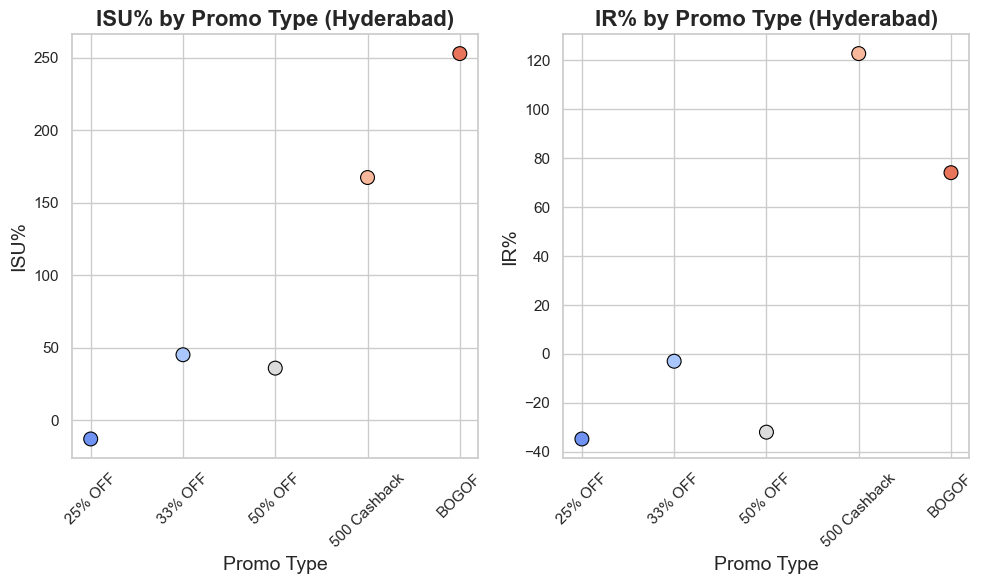

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot to be more professional
sns.set(style="whitegrid")

# Create a figure for the subplots
plt.figure(figsize=(10, 6))

# Create the first scatter plot for ISU%
plt.subplot(1, 2, 1)
sns.scatterplot(data=aggregated_campaign, x='promo_type', y='ISU%', 
                s=100, hue='promo_type', palette='coolwarm', edgecolor='black', marker='o', legend=None)
plt.title('ISU% by Promo Type (Hyderabad)', fontsize=16, fontweight='bold')
plt.xlabel('Promo Type', fontsize=14)
plt.ylabel('ISU%', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Create the second scatter plot for IR%
plt.subplot(1, 2, 2)
sns.scatterplot(data=aggregated_campaign, x='promo_type', y='IR%', 
                s=100, hue='promo_type', palette='coolwarm', edgecolor='black', marker='o', legend=None)
plt.title('IR% by Promo Type (Hyderabad)', fontsize=16, fontweight='bold')
plt.xlabel('Promo Type', fontsize=14)
plt.ylabel('IR%', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


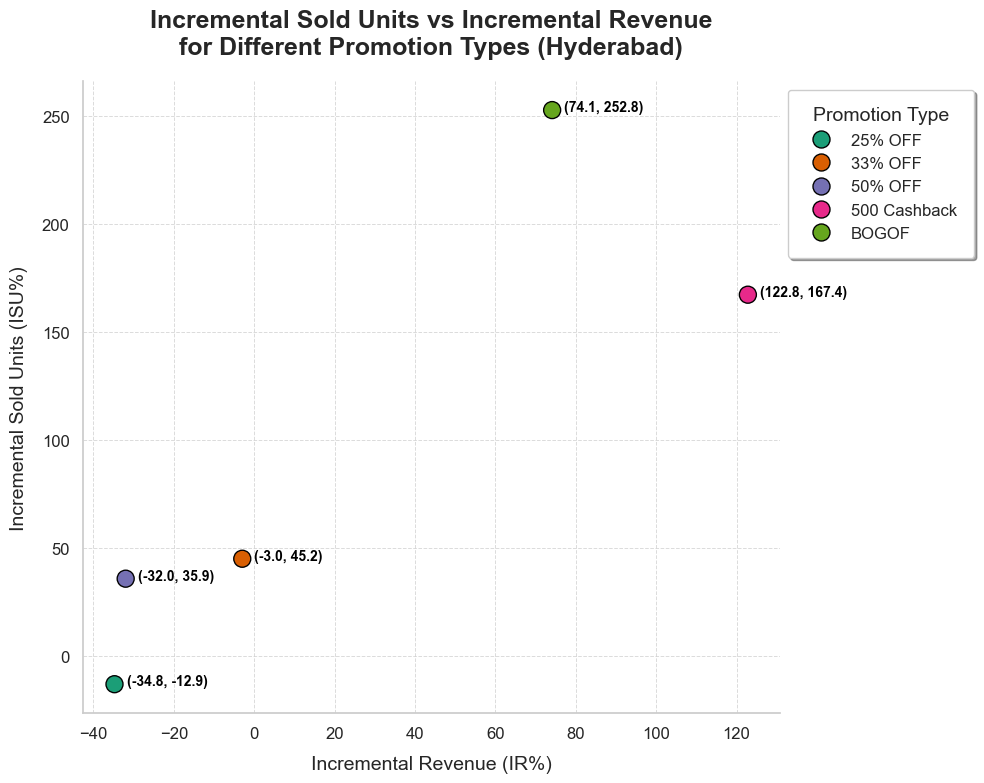

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot for ISU% vs IR% for each promotion type
plt.figure(figsize=(10, 8))

# Scatter plot with enhanced visuals
scatter = sns.scatterplot(
    data=aggregated_campaign,
    x='IR%',
    y='ISU%',
    hue='promo_type',
    palette='Dark2',
    s=150,
    edgecolor='black'
)

# Add annotations for each point with coordinates
for _, row in aggregated_campaign.iterrows():
    scatter.text(
        row['IR%'] + 3, row['ISU%'] - 0.5,  # Slightly offset from the point
        f"({row['IR%']:.1f}, {row['ISU%']:.1f})",  # Annotate coordinates
        fontsize=10,
        color='black',
        weight='bold'
    )

# Customize plot appearance
plt.title(
    'Incremental Sold Units vs Incremental Revenue\nfor Different Promotion Types (Hyderabad)',
    fontsize=18, fontweight='bold', pad=20
)
plt.ylabel('Incremental Sold Units (ISU%)', fontsize=14, labelpad=10)
plt.xlabel('Incremental Revenue (IR%)', fontsize=14, labelpad=10)

# Customize legend
plt.legend(
    title='Promotion Type',
    loc='upper left',
    bbox_to_anchor=(1, 1),
    fontsize=12,
    title_fontsize=14,
    frameon=True,
    shadow=True,
    borderpad=1
)

# Add gridlines for better readability
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)

# Adjust ticks for better visibility
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove unnecessary spines
sns.despine()

# Optimize layout for tight display
plt.tight_layout()

# Show the plot
plt.show()


## **Q7**

In [58]:
merged

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),city
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Chennai
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Chennai
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Bengaluru
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Bengaluru
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Hyderabad
...,...,...,...,...,...,...,...,...,...,...
1495,9bd616,STCHE-0,CAMP_DIW_01,P01,172,330.0,33% OFF,115,504,Chennai
1496,fe4a15,STCBE-4,CAMP_SAN_01,P01,172,205.0,33% OFF,115,284,Coimbatore
1497,2f0b42,STVSK-1,CAMP_SAN_01,P01,172,78.0,33% OFF,115,302,Visakhapatnam
1498,339bf7,STCHE-5,CAMP_DIW_01,P05,55,127.0,25% OFF,41,109,Chennai


In [59]:
df_products

,product_code,product_name,category
0,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples
1,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
2,P03,Atliq_Suflower_Oil (1L),Grocery & Staples
3,P04,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
4,P05,Atliq_Scrub_Sponge_For_Dishwash,Home Care
5,P06,Atliq_Fusion_Container_Set_of_3,Home Care
6,P09,Atliq_Body_Milk_Nourishing_Lotion (120ML),Personal Care
7,P10,Atliq_Cream_Beauty_Bathing_Soap (125GM),Personal Care
8,P13,Atliq_High_Glo_15W_LED_Bulb,Home Appliances
9,P14,Atliq_waterproof_Immersion_Rod,Home Appliances


In [60]:
merged = pd.merge(merged, df_products, on='product_code')
merged

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),city,product_name,category
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Chennai,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Chennai,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Bengaluru,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Bengaluru,Atliq_Scrub_Sponge_For_Dishwash,Home Care
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Hyderabad,Atliq_Home_Essential_8_Product_Combo,Combo
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,9bd616,STCHE-0,CAMP_DIW_01,P01,172,330.0,33% OFF,115,504,Chennai,Atliq_Masoor_Dal (1KG),Grocery & Staples
1496,fe4a15,STCBE-4,CAMP_SAN_01,P01,172,205.0,33% OFF,115,284,Coimbatore,Atliq_Masoor_Dal (1KG),Grocery & Staples
1497,2f0b42,STVSK-1,CAMP_SAN_01,P01,172,78.0,33% OFF,115,302,Visakhapatnam,Atliq_Masoor_Dal (1KG),Grocery & Staples
1498,339bf7,STCHE-5,CAMP_DIW_01,P05,55,127.0,25% OFF,41,109,Chennai,Atliq_Scrub_Sponge_For_Dishwash,Home Care


In [61]:
merged_bgl = merged[merged['city'] == 'Bengaluru']
merged_bgl

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),city,product_name,category
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Bengaluru,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Bengaluru,Atliq_Scrub_Sponge_For_Dishwash,Home Care
8,66c422,STBLR-5,CAMP_DIW_01,P07,300,66.0,BOGOF,150,227,Bengaluru,Atliq_Curtains,Home Care
10,a7fecb,STBLR-1,CAMP_SAN_01,P03,200,361.0,BOGOF,100,963,Bengaluru,Atliq_Suflower_Oil (1L),Grocery & Staples
14,02ebe9,STBLR-8,CAMP_DIW_01,P11,190,66.0,50% OFF,95,88,Bengaluru,Atliq_Doodh_Kesar_Body_Lotion (200ML),Personal Care
...,...,...,...,...,...,...,...,...,...,...,...,...
1476,6ae240,STBLR-4,CAMP_SAN_01,P13,350,94.0,BOGOF,175,371,Bengaluru,Atliq_High_Glo_15W_LED_Bulb,Home Appliances
1479,57576d,STBLR-5,CAMP_SAN_01,P08,1190,49.0,BOGOF,595,194,Bengaluru,Atliq_Double_Bedsheet_set,Home Care
1485,8f5618,STBLR-1,CAMP_DIW_01,P04,290,302.0,25% OFF,217,289,Bengaluru,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
1487,c95efb,STBLR-7,CAMP_DIW_01,P15,3000,416.0,500 Cashback,2500,1389,Bengaluru,Atliq_Home_Essential_8_Product_Combo,Combo


In [62]:
merged_bgl.loc[:,'rev_before_promo'] = merged_bgl['base_price(before_promo)'] * merged_bgl['quantity_sold(before_promo)']
merged_bgl.loc[:,'rev_after_promo'] = merged_bgl['base_price(after_promo)'] * merged_bgl['quantity_sold(after_promo)']

merged_bgl

C:\Users\maazs\AppData\Local\Temp\ipykernel_16676\3374996637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_bgl.loc[:,'rev_before_promo'] = merged_bgl['base_price(before_promo)'] * merged_bgl['quantity_sold(before_promo)']
C:\Users\maazs\AppData\Local\Temp\ipykernel_16676\3374996637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_bgl.loc[:,'rev_after_promo'] = merged_bgl['base_price(after_promo)'] * merged_bgl['quantity_sold(after_promo)']


,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),city,product_name,category,rev_before_promo,rev_after_promo
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Bengaluru,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,289820.0,281088
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Bengaluru,Atliq_Scrub_Sponge_For_Dishwash,Home Care,6710.0,4387
8,66c422,STBLR-5,CAMP_DIW_01,P07,300,66.0,BOGOF,150,227,Bengaluru,Atliq_Curtains,Home Care,19800.0,34050
10,a7fecb,STBLR-1,CAMP_SAN_01,P03,200,361.0,BOGOF,100,963,Bengaluru,Atliq_Suflower_Oil (1L),Grocery & Staples,72200.0,96300
14,02ebe9,STBLR-8,CAMP_DIW_01,P11,190,66.0,50% OFF,95,88,Bengaluru,Atliq_Doodh_Kesar_Body_Lotion (200ML),Personal Care,12540.0,8360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,6ae240,STBLR-4,CAMP_SAN_01,P13,350,94.0,BOGOF,175,371,Bengaluru,Atliq_High_Glo_15W_LED_Bulb,Home Appliances,32900.0,64925
1479,57576d,STBLR-5,CAMP_SAN_01,P08,1190,49.0,BOGOF,595,194,Bengaluru,Atliq_Double_Bedsheet_set,Home Care,58310.0,115430
1485,8f5618,STBLR-1,CAMP_DIW_01,P04,290,302.0,25% OFF,217,289,Bengaluru,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,87580.0,62713
1487,c95efb,STBLR-7,CAMP_DIW_01,P15,3000,416.0,500 Cashback,2500,1389,Bengaluru,Atliq_Home_Essential_8_Product_Combo,Combo,1248000.0,3472500


In [63]:
aggregated_campaign = merged_bgl.groupby('category').agg(
    revenue_before_promo = ('rev_before_promo','sum'),
    revenue_after_promo = ('rev_after_promo','sum'),
).reset_index()

aggregated_campaign

,category,revenue_before_promo,revenue_after_promo
0,Combo,15777000.0,38125000
1,Grocery & Staples,12262460.0,13861259
2,Home Appliances,2188810.0,4122680
3,Home Care,2104460.0,3180020
4,Personal Care,576321.0,389629


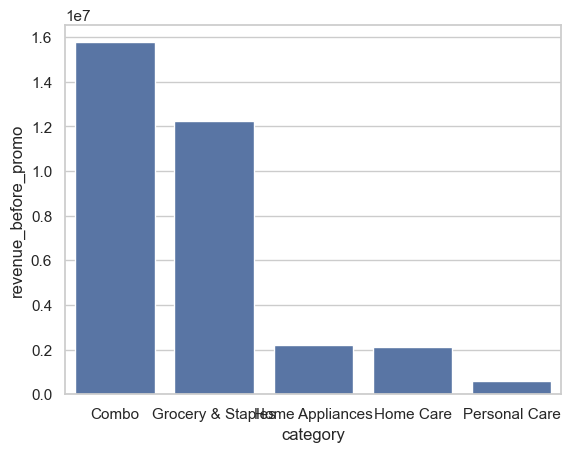

In [64]:
sns.barplot(aggregated_campaign, x='category', y='revenue_before_promo');

In [65]:
# Melt the DataFrame to create a column for revenue type (before or after promo)
aggregated_campaign_melted = aggregated_campaign.melt(
    id_vars='category', 
    value_vars=['revenue_before_promo', 'revenue_after_promo'],
    var_name='Revenue Type', 
    value_name='Revenue'
)

aggregated_campaign_melted

,category,Revenue Type,Revenue
0,Combo,revenue_before_promo,15777000.0
1,Grocery & Staples,revenue_before_promo,12262460.0
2,Home Appliances,revenue_before_promo,2188810.0
3,Home Care,revenue_before_promo,2104460.0
4,Personal Care,revenue_before_promo,576321.0
5,Combo,revenue_after_promo,38125000.0
6,Grocery & Staples,revenue_after_promo,13861259.0
7,Home Appliances,revenue_after_promo,4122680.0
8,Home Care,revenue_after_promo,3180020.0
9,Personal Care,revenue_after_promo,389629.0


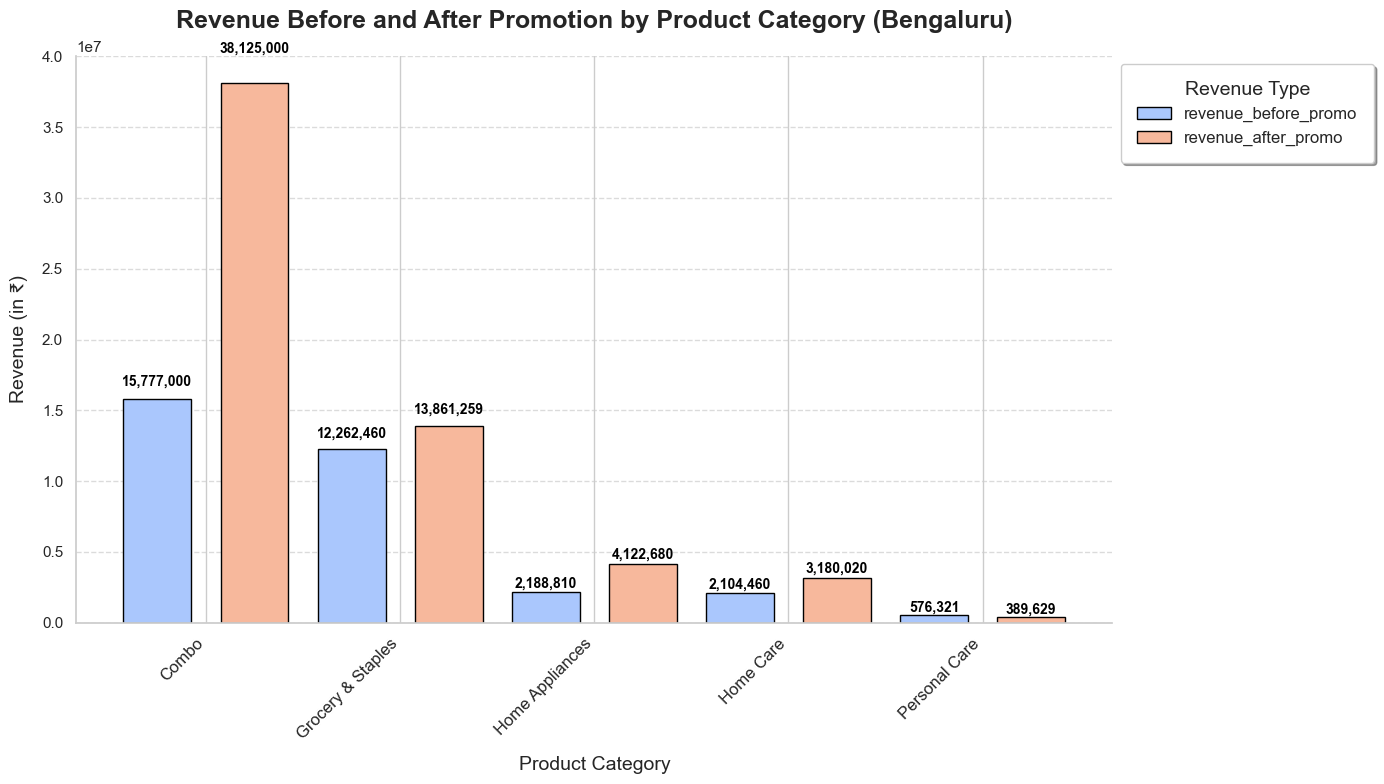

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'aggregated_campaign_melted' is your DataFrame

# Sort categories for clarity (optional)
aggregated_campaign_melted = aggregated_campaign_melted.sort_values(by='category')

# Unique categories and revenue types
categories = aggregated_campaign_melted['category'].unique()
revenue_types = aggregated_campaign_melted['Revenue Type'].unique()

# Generate x positions for each category with spacing
x_positions = np.arange(len(categories))  # Base positions for categories
bar_width = 0.35  # Width of each bar
spacing = 0.15  # Space between bars in each category

# Create a figure
plt.figure(figsize=(14, 8))

# Iterate over revenue types and plot bars
for i, rev_type in enumerate(revenue_types):
    data = aggregated_campaign_melted[aggregated_campaign_melted['Revenue Type'] == rev_type]
    positions = x_positions + (i * (bar_width + spacing) - (bar_width + spacing) / 2)
    plt.bar(
        positions,
        data['Revenue'],
        width=bar_width,
        label=rev_type,
        color=sns.color_palette('coolwarm', len(revenue_types))[i],
        edgecolor='black'
    )

# Customize plot title and labels
plt.title(
    'Revenue Before and After Promotion by Product Category (Bengaluru)',
    fontsize=18,
    fontweight='bold',
    pad=20
)
plt.xlabel('Product Category', fontsize=14, labelpad=10)
plt.ylabel('Revenue (in ₹)', fontsize=14, labelpad=10)

# Customize x-axis ticks
plt.xticks(x_positions, categories, rotation=45, ha='right', fontsize=12)

# Enhance legend appearance
plt.legend(
    title='Revenue Type',
    title_fontsize=14,
    fontsize=12,
    loc='upper left',
    bbox_to_anchor=(1, 1),
    frameon=True,
    shadow=True,
    borderpad=1
)

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value annotations for each bar
for bar in plt.gca().patches:
    height = bar.get_height()
    if height > 0:  # Avoid annotating bars with zero height
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.05 * height,
            f'{int(height):,}',  # Format as an integer with commas
            ha='center',
            va='bottom',
            fontsize=10,
            color='black',
            weight='bold'
        )

# Remove unnecessary spines
sns.despine()

# Adjust layout for a polished appearance
plt.tight_layout()

# Show plot
plt.show()


In [58]:
merged_bgl

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),city,product_name,category,rev_before_promo,rev_after_promo
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Bengaluru,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,289820.0,281088
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Bengaluru,Atliq_Scrub_Sponge_For_Dishwash,Home Care,6710.0,4387
8,66c422,STBLR-5,CAMP_DIW_01,P07,300,66.0,BOGOF,150,227,Bengaluru,Atliq_Curtains,Home Care,19800.0,34050
10,a7fecb,STBLR-1,CAMP_SAN_01,P03,200,361.0,BOGOF,100,963,Bengaluru,Atliq_Suflower_Oil (1L),Grocery & Staples,72200.0,96300
14,02ebe9,STBLR-8,CAMP_DIW_01,P11,190,66.0,50% OFF,95,88,Bengaluru,Atliq_Doodh_Kesar_Body_Lotion (200ML),Personal Care,12540.0,8360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,6ae240,STBLR-4,CAMP_SAN_01,P13,350,94.0,BOGOF,175,371,Bengaluru,Atliq_High_Glo_15W_LED_Bulb,Home Appliances,32900.0,64925
1479,57576d,STBLR-5,CAMP_SAN_01,P08,1190,49.0,BOGOF,595,194,Bengaluru,Atliq_Double_Bedsheet_set,Home Care,58310.0,115430
1485,8f5618,STBLR-1,CAMP_DIW_01,P04,290,302.0,25% OFF,217,289,Bengaluru,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,87580.0,62713
1487,c95efb,STBLR-7,CAMP_DIW_01,P15,3000,416.0,500 Cashback,2500,1389,Bengaluru,Atliq_Home_Essential_8_Product_Combo,Combo,1248000.0,3472500
